In [30]:
import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
gamma = 1
eta = 0.5
sigma = 5
beta_hh = 0.99
r = 0.01
beta = 1 /( 1.0 +r)
beta1 =1/( (1.0 +r* np.exp(30/(36.5*0.9)))) 
W = 1
power = ((1+eta)/(-gamma+eta))

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/2291322681.py:6: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/2291322681.py:7: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/2291322681.py:9: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


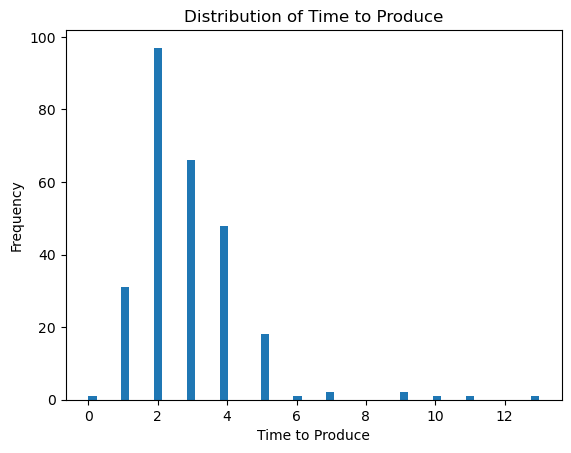

In [32]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]
argmins
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()
tau = np.array(tau, dtype=int)

In [66]:

def consumption_function(P, theta):
    return (P)**power * theta**(1/(gamma+eta))
def euler_equation(P_0, P_1, theta_0, theta_1, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1, theta_1) / consumption_function(P_0, theta_0))**((gamma))
    price_growth_comp = (P_0 / P_1)* (theta_1/theta_0)
    wage_inflation = 1/(consumption_growth_comp / (price_growth_comp *  (beta_hh *   (1+r)) ))
    return wage_inflation
def price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)
    constants = (beta_hh * (1+r))
    price_inflation = 1/ (consumption_growth_comp / constants)
    return price_inflation

In [67]:
theta_list = np.ones((5,1))
theta_list[1] = 0.97

In [68]:
power = (1+eta)/(-gamma-eta)
tau1= -1/np.log(beta*c) - N
tau1[tau1<0] = 0  
tau1_floor = np.floor(tau1)
tau1_ceil = np.ceil(tau1)
tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)**1
tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)**1

tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = (beta*c)**tau1 * (tau1 + N)**1

tau1 = tau1[::-1]

tprod1=  np.array((beta*c)**tau1 * (tau1 + N)**1 )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))


In [36]:
consumption = np.zeros((len(theta_list), 1))
consumption[0] = consumption_function(P0, theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P0, theta_list[i])

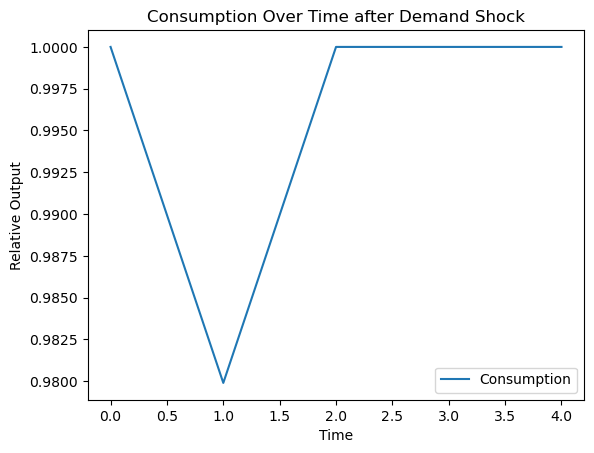

In [37]:
import matplotlib.pyplot as plt
plt.plot( consumption/consumption[0], label='Consumption')
plt.xlabel('Time')
plt.ylabel('Relative Output')
plt.title('Consumption Over Time after Demand Shock')
plt.legend()
plt.show()


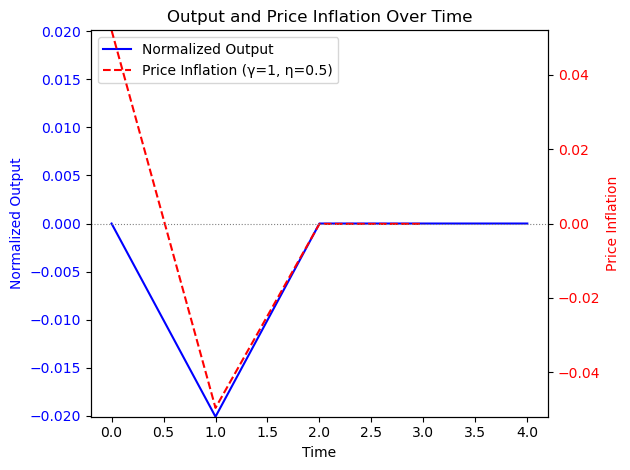

In [38]:
import matplotlib.pyplot as plt
import numpy as np
P = P0
theta_list = np.ones((5,1))
theta_list[1] = 0.97
# First plot data
normalized_output = consumption/consumption[0] - 1  # Center at 0

# Second plot data
wage_inflation = np.zeros(len(theta_list)-1 )
for i in range(len(theta_list)-1):
    P_0 = P0
    P_1 = P0
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation[i] = price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)
wage_inflation_centered = wage_inflation - 1  # Center at 0

# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot normalized output
ax1.plot(normalized_output, 'b-', label='Normalized Output')
ax1.set_xlabel('Time')
ax1.set_ylabel('Normalized Output', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Output and Price Inflation Over Time')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(range(len(wage_inflation_centered)), wage_inflation_centered, 'r--',
         label=f'Price Inflation (γ={gamma}, η={eta})')
ax2.set_ylabel('Price Inflation', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# --- Center both y-axes at zero ---
# Get limits and compute symmetrical bounds
y1_max = max(abs(np.min(normalized_output)), abs(np.max(normalized_output)))
y2_max = max(abs(np.min(wage_inflation_centered)), abs(np.max(wage_inflation_centered)))

ax1.set_ylim(-y1_max, y1_max)
ax2.set_ylim(-y2_max, y2_max)

# Optional: combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)  # horizontal line at y=0
plt.tight_layout()
plt.show()

In [39]:
r_arrange = np.linspace(0.009, 0.011, 100)
P = np.zeros((20, 100))
k=0
tau_list = {}
index_diff_list = {}
for r in r_arrange: 
    beta_org = (1 / (1 + 0.01))*c
    tau= -1/np.log(beta_org) - N
    tau[tau<0] = 0  
    tau_floor = np.floor(tau)
    tau_ceil = np.ceil(tau)
    tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
    tprod_floor=  beta_org**tau_floor * (tau_floor + N)
    tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
    tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
    tau[tau<0] = 0 
    tprod1=  np.array(beta_org**tau * (tau + N) )  
    P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 

    beta_rep = (1 / (1 + r))*c
    tau_rep= -1/np.log(beta_rep) - N
    tau_rep[tau_rep<0] = 0  
    tau_rep_floor = np.floor(tau_rep)
    tau_rep_ceil = np.ceil(tau_rep)
    tprod_ceil=  beta_rep**tau_rep_ceil * (tau_rep_ceil + N)
    tprod_floor=  beta_rep**tau_rep_floor * (tau_rep_floor + N)
    tau_rep[(tprod_ceil-tprod_floor)>0] = tau_rep_ceil[(tprod_ceil-tprod_floor)>0]
    tau_rep[(tprod_ceil-tprod_floor)<0] = tau_rep_floor[(tprod_ceil-tprod_floor)<0]
    tau_rep[tau_rep<0] = 0 
    tprod_rep=  np.array(beta_rep**tau_rep * (tau_rep + N) )  
    P1 = (np.sum(1/(tprod_rep)**(1-sigma)))**(1/(1-sigma)) 

    P[0, k] = P0
    tau_list[k] = np.array(tau_rep)
    tau = tau.sort_values()
    tau_rep = tau_rep.sort_values()
    diff = tau-tau_rep
    index_diff=tau_rep[diff !=0].index
    index_diff_list[k] = np.sum(index_diff!=0)

    for j in range(0, int(np.max(tau_rep)) + 1):
        tau1_temp = pd.Series(tau[tau > j])
        tau2_temp = pd.Series(tau_rep[tau_rep <= j])

        tau1_temp_df = tau1_temp.to_frame(name='t')
        tau1_temp_df['source'] = 'org'

        tau2_temp_df = tau2_temp.to_frame(name='t')
        tau2_temp_df['source'] = 'rep'

        t_temp = pd.concat([tau1_temp_df, tau2_temp_df])

        dup_indices = t_temp.index[t_temp.index.duplicated(keep=False)].unique()

        keep_rows = []

        for i in dup_indices:
            rows = t_temp.loc[[i]]
            N_temp = N.loc[[i]]
            t_org = rows[rows['source'] == 'org']['t'].values[0]
            t_rep = rows[rows['source'] == 'rep']['t'].values[0]

            tprod_org_temp = beta_org**t_org * (t_org + N_temp)
            tprod_rep_temp = beta_rep**t_rep * (t_rep + N_temp)
            if i ==j:
                tprod_rep_temp = 1.0*beta_rep**t_rep * (t_rep + N_temp)

            # Keep only the row with the higher value
            if tprod_org_temp.values >= tprod_rep_temp.values:
                keep_rows.append(rows[rows['source'] == 'org'])
            else:
                keep_rows.append(rows[rows['source'] == 'rep'])

        # Drop all duplicates first
        t_temp = t_temp[~t_temp.index.isin(dup_indices)]

        # Add back only the best ones
        if keep_rows:
            t_temp = pd.concat([t_temp] + keep_rows)
        t_temp['N'] = N.loc[t_temp.index].values

        # Step 1: Add matching N values
        t_temp['N'] = N.loc[t_temp.index].values  # will align correctly by NAICS6 index

        # Step 2: Compute t_prod using vectorized logic
        beta_vec = t_temp['source'].map({'org': beta_org, 'rep': beta_rep})
        A_vec = np.where((t_temp['source'] == 'rep') & (t_temp['t'] == j), 1.0, 1.0)
        t_temp['A'] = A_vec
        t_temp['t_prod'] = A_vec * beta_vec ** t_temp['t'] * (t_temp['t'] + t_temp['N'])
        
        tprod_temp = t_temp['t_prod'].values
        P[j + 1, k] = (np.sum(1 / (tprod_temp ** (1 - sigma)))) ** (1 / (1 - sigma))
    P[j+1, k] = P1

    k = k+1
    print(k)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [62]:
k=0
deviation_gap = np.zeros((100, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.3
    

    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
    Y[1:] = Y[1:]/ Y[0]
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap[k] = np.sum((Y - 1 )**2) 
    k = k+1

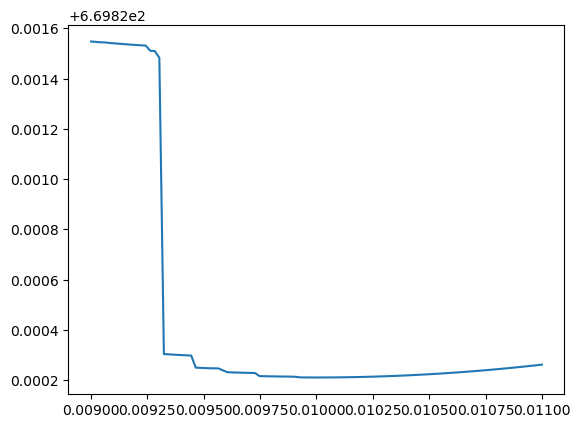

In [63]:
plt.plot(r_arrange,deviation_gap)
plt.show()

In [64]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
r_arrange[argmins_gap]

array([0.0100101])

In [65]:
consumption = np.zeros((len(P[:,argmins_gap]), 1))
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.97
consumption[0] = consumption_function(P[0,argmins_gap], theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P[i,argmins_gap], theta_list[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


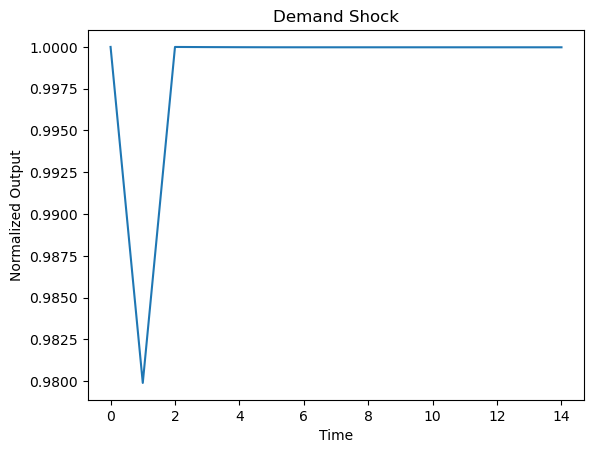

In [44]:
plt.plot( consumption / consumption[0])
plt.title('Demand Shock')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

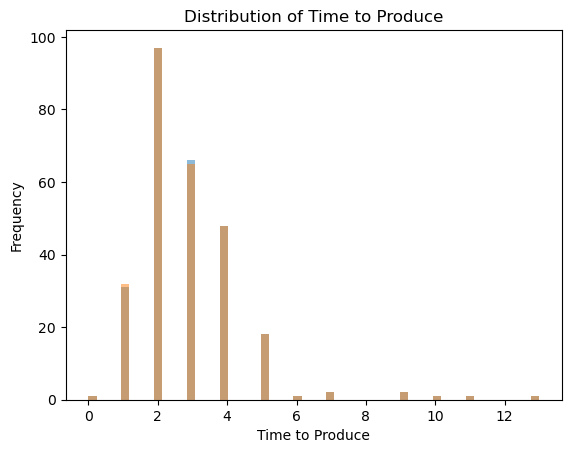

In [45]:
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  

beta_new = (1 / (1 + 0.01010101))
tau_new= -1/np.log(beta_new*c) - N
tau_new[tau_new<0] = 0  
tau_new_floor = np.floor(tau_new)
tau_new_ceil = np.ceil(tau_new)
tprod_new_ceil=  (beta_new*c)**tau_new_ceil * (tau_new_ceil + N)
tprod_new_floor=  (beta_new*c)**tau_new_floor * (tau_new_floor + N)
tau_new[(tprod_new_ceil-tprod_new_floor)>0] = tau_new_ceil[(tprod_new_ceil-tprod_new_floor)>0]
tau_new[(tprod_new_ceil-tprod_new_floor)<0] = tau_new_floor[(tprod_new_ceil-tprod_new_floor)<0]
tau_new[tau_new<0] = 0


plt.hist(tau, bins = 55, alpha=0.5, label='tau_noise')
plt.hist(tau_new, bins = 55, alpha=0.5, label='tau_new')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()

In [46]:
wage_inflation = np.zeros(len(P[:,argmins_gap])-1)
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.97
for i in range(len(P[:,argmins_gap])-1):
    P_0 = P[:,argmins_gap][i]
    P_1 = P[:,argmins_gap][i+1]
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:9: RuntimeWarning: invalid value encountered in divide
  consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)


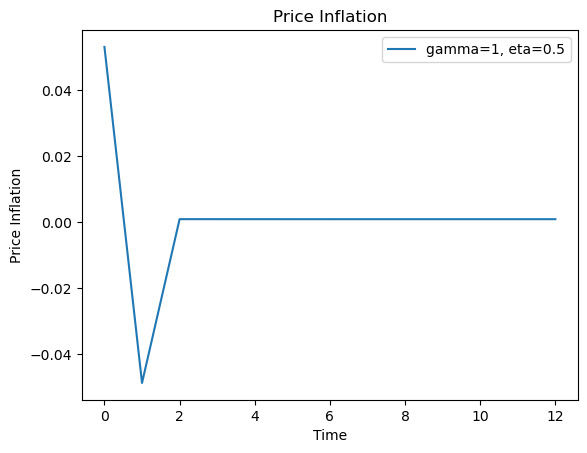

In [47]:
plt.plot(wage_inflation[:13]-1, label=f'gamma={gamma}, eta={eta}')
plt.title('Price Inflation')
plt.xlabel('Time')
plt.ylabel('Price Inflation')
plt.legend()
plt.show()

In [48]:
k=0
deviation_gap_inflation = np.zeros((100, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.97


    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
        if j ==0:
            normalizer = consumption_function(P_temp_no_zeros[j], theta_list[j])
            Y[j] = Y[j]/normalizer
        else:
            Y[j] = Y[j]/normalizer
    Y[1:] = Y[1:]/ Y[-1]
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap_inflation[k] = np.sum((wage_inflation- 1 )**2) 
    k = k+1

In [49]:
k=0
deviation_gap_output = np.zeros((100, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.9


    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
        if j ==0:
            normalizer = consumption_function(P_temp_no_zeros[0], theta_list[0])
            Y[j] = Y[j]/normalizer
        else:
            Y[j] = Y[j]
    Y[1:] = Y[1:]/ normalizer
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap_output[k] =  np.sum((Y - 1 )**2)
    k = k+1

In [50]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
argmins_gap_output = np.where(deviation_gap_output == np.min(deviation_gap_output))[0]
argmins_gap_inflation = np.where(deviation_gap_inflation == np.min(deviation_gap_inflation))[0]

In [51]:
print(r_arrange[argmins_gap])
print(r_arrange[argmins_gap_output])
print(r_arrange[argmins_gap_inflation])

[0.0100101]
[0.0100101]
[0.00944444]


In [52]:
consumption = np.zeros((len(P[:,argmins_gap]), 1))
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.97
consumption[0] = consumption_function(P[0,argmins_gap], theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P[i,argmins_gap], theta_list[i])
    

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


In [53]:
consumption_output = np.zeros((len(P[:,argmins_gap_output]), 1))
theta_list_output = np.ones_like(P[:,argmins_gap_output])
theta_list_output[1] = 0.97
consumption_output[0] = consumption_function(P[0,argmins_gap_output], theta_list_output[0])
for i in range(1, len(theta_list_output)):
    consumption_output[i] = consumption_function(P[i,argmins_gap_output], theta_list_output[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


In [54]:
consumption_inflation = np.zeros((len(P[:,argmins_gap_inflation]), 1))
theta_list_inflation = np.ones_like(P[:,argmins_gap_inflation])     
theta_list_inflation[1] = 0.97
consumption_inflation[0] = consumption_function(P[0,argmins_gap_inflation], theta_list_inflation[0])
for i in range(1, len(theta_list_inflation)):
    consumption_inflation[i] = consumption_function(P[i,argmins_gap_inflation], theta_list_inflation[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


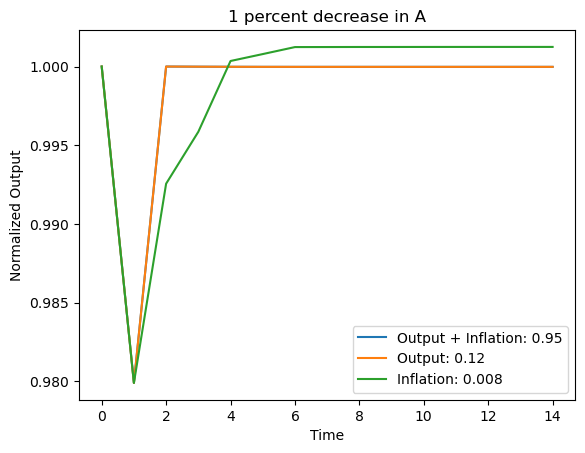

In [55]:
plt.plot(consumption / consumption[0])
plt.plot(consumption_output / consumption_output[0])
plt.plot(consumption_inflation / consumption_inflation[0])
plt.legend(['Output + Inflation: 0.95', 'Output: 0.12', 'Inflation: 0.008'])

plt.title('1 percent decrease in A')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

In [56]:
wage_inflation = np.zeros(len(P[:,argmins_gap])-1)
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.97
for i in range(len(P[:,argmins_gap])-1):
    P_0 = P[:,argmins_gap][i]
    P_1 = P[:,argmins_gap][i+1]
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r_arrange[argmins_gap])

wage_inflation_output = np.zeros(len(P[:,argmins_gap_output])-1)
theta_list = np.ones_like(P[:,argmins_gap_output])
theta_list[1] = 0.97
for i in range(len(P[:,argmins_gap_output])-1):
    P_0 = P[:,argmins_gap_output][i]
    P_1 = P[:,argmins_gap_output][i+1]
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation_output[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r_arrange[argmins_gap_output])

wage_inflation_inflation = np.zeros(len(P[:,argmins_gap_inflation])-1)
theta_list = np.ones_like(P[:,argmins_gap_inflation])
theta_list[1] = 0.97
for i in range(len(P[:,argmins_gap_inflation])-1):
    P_0 = P[:,argmins_gap_inflation][i]
    P_1 = P[:,argmins_gap_inflation][i+1]
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r_arrange[argmins_gap_inflation])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2830/850672584.py:9: RuntimeWarning: invalid value encountered in divide
  consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)


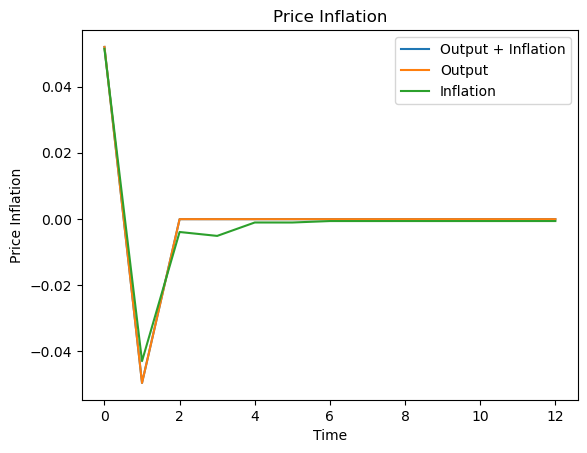

In [57]:
plt.plot(wage_inflation[:13]-1, label=f'Output + Inflation')
plt.plot(wage_inflation_output[:13]-1, label=f'Output')
plt.plot(wage_inflation_inflation[:13]-1, label=f'Inflation')
plt.title('Price Inflation')
plt.xlabel('Time')
plt.ylabel('Price Inflation')
plt.legend()
plt.show()

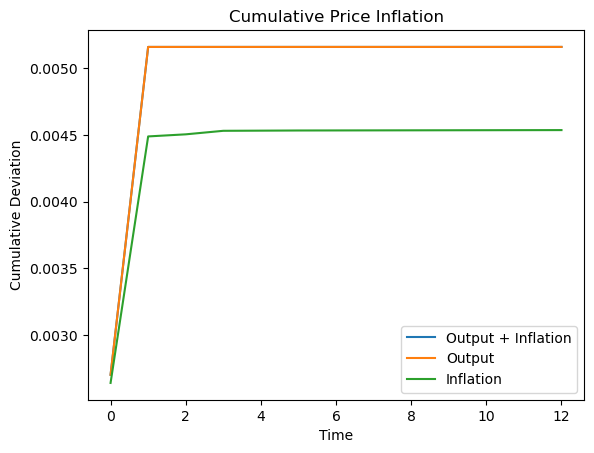

In [58]:
plt.plot(np.cumsum((wage_inflation[:13]-1)**2))
plt.plot(np.cumsum((wage_inflation_output[:13]-1)**2))
plt.plot(np.cumsum((wage_inflation_inflation[:13]-1)**2))
plt.legend(['Output + Inflation', 'Output', 'Inflation'])
plt.title('Cumulative Price Inflation')
plt.xlabel('Time')
plt.ylabel('Cumulative Deviation')
plt.show()  